In [134]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt

In [135]:
# Read in data
df = pd.read_excel("Cleaned June 2020 Prison Stock Pop.xls")

In [136]:
# Clean data
df["Custody Date"] = pd.to_datetime(df["Custody Date"], format="%Y-%m-%d") #Custody Date is the start of an inmate's sentence
df["Date of Birth"] = pd.to_datetime(df["Date of Birth"], format="%Y-%m-%d")

In [137]:
df

,IDOC #,Name,Date of Birth,Sex,Race,Veteran Status,Current Admission Date,Admission Type,Parent Institution,Projected Mandatory Supervised Release (MSR) Date,Projected Discharge Date,Custody Date,Sentence Date,Crime Class,Holding Offense,Sentence Years,Sentence Months,Truth in Sentencing,Sentencing County
0,A00147,"MCCUTCHEON, JOHN",1949-06-14,Male,White,Yes,1983-02-16,Discharged & recommitted,Dixon,2033-10-06 00:00:00,2036-10-06 00:00:00,1982-11-26,1983-02-15,Class X,ATTEMPT MURDER/INTENT TO KILL/INJURE,0050,00,Day-for-Day,Jasper
1,A01054,"TIPTON, DARNELL",1954-03-25,Male,Black,No,1988-12-23,"Parole violator, New sentence",Western Illinois,2065-08-14 00:00:00,2068-08-14 00:00:00,1986-09-29,1987-08-07,Class X,AGG CRIM SEX ASSAULT/WEAPON,0060,00,Day-for-Day,Cook
2,A01072,"BRISBON, HENRY",1956-01-12,Male,Black,No,1974-02-22,Direct from court,Pontiac,NaN,NaN,1982-02-24,1982-02-24,Murder,MURDER/INTENT TO KILL/INJURE,LIFE,,Day-for-Day,Will
3,A01077,"JONES, ROBERT",1953-04-03,Male,Black,No,1983-09-16,"MSR violator, New sentence",Pinckneyville,NaN,NaN,1982-04-13,1983-09-15,Murder,MURDER/INTENT TO KILL/INJURE,LIFE,,Day-for-Day,Cook
4,A01148,"BROWN, RONALD",1955-02-02,Male,Black,No,2005-12-13,Discharged & recommitted,Western Illinois,NaN,NaN,1998-10-03,2005-12-09,Murder,MURDER/INTENT TO KILL/INJURE,LIFE,,Day-for-Day,Cook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,Y42081,"LEISGANG, ANDREA S.",1982-03-01,Female,White,Unknown,2020-03-26,Direct from court,Logan,2082-08-20 00:00:00,NaN,2018-11-20,2020-03-20,Class X,PRED CRIM SEX ASSLAUT/VICTIM <13,0060,00,85%,Madison
32044,Y42082,"KECK, BRANDY J.",1978-07-23,Female,White,Unknown,2020-03-26,Direct from court,Logan,2020-07-24 00:00:00,2021-07-24 00:00:00,2020-01-24,2020-03-23,Class 4,POSS AMT CON SUB EXCEPT(A)/(D),0001,00,Day-for-Day,Madison
32045,Y42083,"NELLIGAN, JOHN J.",1988-08-31,Male,White,Unknown,2020-03-26,Direct from court,Graham,2021-02-20 00:00:00,2022-02-20 00:00:00,2020-02-20,2020-03-19,Class 4,POSS AMT CON SUB EXCEPT(A)/(D),0003,00,Day-for-Day,Jefferson
32046,Y42173,"GONZALEZ, RENE",1973-06-13,Male,Hispanic,Unknown,2020-06-18,Technical MSR violator,Stateville,2020-05-11 00:00:00,2022-05-11 00:00:00,2018-09-10,2020-04-22,Class 2,AGG CRIM SEX ABUSE/VICTIM <13,0003,00,Day-for-Day,Cook


In [138]:
# VARIABLES TO BE USED IN MULTIPLE CALCULATIONS

# Costs
costOfAnInmate = 34135
costOfAnInmateOverSixty = 68270
costOfPersonOnParole = 2100

# EDR Hearings per month limit
maxHearingsPerMonth2022 = 500

# Grant rates
conservativeGrantRate = .197
semiconservativeGrantRate = .356
liberalGrantRate = .465

# Inmates qualified for EDR prior to January 1st, 2022
before2022 = pd.to_datetime(str(2022 - 20) + "-01-01")
qualifiedBefore2022 = len(df.loc[(df["Custody Date"] < before2022)])

# Statistics for Inmates Granted EDR in 2022
### Number of Inmates Released by End of 2022, and Savings from Doing So

In [139]:
#Calculate the number of inmates who will have served 20 years of their sentence by 2022
twentyYearsServedDate = pd.to_datetime(str(2022 - 20) + "-12-31")

numReleased = len(df.loc[df["Custody Date"] <= twentyYearsServedDate])

#Savings from the reduction in inmate population
savings = (numReleased * (costOfAnInmate - costOfPersonOnParole))
print(numReleased)
print(savings)

#Calculate the cost of all hearings that will occur in 2022
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================
#============NEED TO FINISH THIS===============================================================



#STILL NEED TO CREATE PLOT FOR THIS DATA FROM JANUARY 2022 TO DECEMBER 2022

4408
141210280


The statistics below have been calculated assuming all inmates who have served 20, or more years of their sentence by the end of 2022, will be granted Earned Discretionary Release(EDR) <br>

- Number of inmates granted EDR with a 100% grant rate: 4408
- Savings to the state of Illinois due to the inmate population reduction: $141,210,280
- STILL NEED TO DO COST OF ADDITIONAL EDR HEARINGS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
<br>

The number of inmates granted EDR by December 31st, 2022 includes inmates who served 20 years or more of their sentence prior to January 1st, 2022.

### How Calculations were Made
- I pulled out all inmates who started their sentences on December 31st, 2002 or earlier from the whole data set. The size of this subset is the number of people who will be granted EDR in 2022
- The cost per incarcerated person per year is \\$34,135, and the cost of a person who is on parole is \\$2,100. To calculate the total savings, the number of inmates who will be released by the end of 2022 was multiplied by \\$34,135, and from that, the total cost of parolees is subtracted.

### Plot number of Inmates Granted Parole per Month With 100% Grant Rate

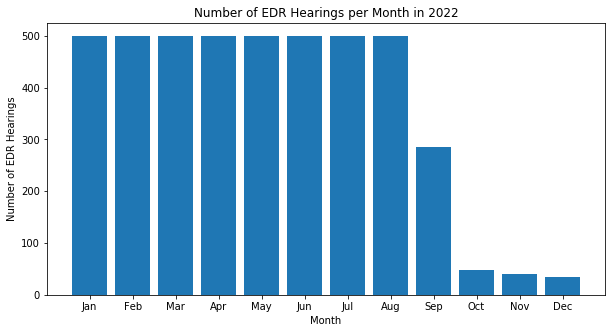

In [140]:
monthlyNumReleased = []
spillOver = qualifiedBefore2022
#Store data that will be plotted
for month in range(1, 13):
    startOfMonth = pd.to_datetime(str(2022 - 20) + "-"+ str(month) + "-01")
    endOfMonth = pd.to_datetime(str(2022 - 20) + "-"+ str(month)) + MonthEnd(0)
    
    numQualifiedDuringMonth = len(df.loc[(df["Custody Date"] >= startOfMonth) & (df["Custody Date"] <= endOfMonth)])
    numReleased = numQualifiedDuringMonth + spillOver
    
    #Account for limits to number of hearings per month
    if(numReleased >= maxHearingsPerMonth2022):
        monthlyNumReleased.append(maxHearingsPerMonth2022)
        spillOver = spillOver - (maxHearingsPerMonth2022 - numQualifiedDuringMonth)
    elif(numReleased >= 0):
        monthlyNumReleased.append(numReleased)
        spillOver = 0
    else:
        monthlyNumReleased.append(numReleased)
        
# Plot EDR hearing data
plt.figure(figsize=(10,5))
plt.bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], monthlyNumReleased)
plt.title("Number of EDR Hearings per Month in 2022")
plt.xlabel("Month")
plt.ylabel("Number of EDR Hearings")
plt.show()

### How Calculations were Made
- The maximum number of EDR hearings per month is 500 hearings. There were 3908 inmates who qualified for EDR prior to Januart 1st, 2022. Inmates who served exactly 20 years of their sentence in a given month were given an EDR hearing that month. The remaining number of inmates a committee can see, up to 500, is filled by inmates who served 20 years, or more of their sentences prior to January 1st, 2022. Remaining inmates are rolled over to the next month.

# Statistics for Number of Inmates 60, or Older to be Released in 2022

In [158]:
def calcNumInmatesOfAgeInRange(startYear, endYear, age, grantRate):
    numInmatesDenied = [0,0]
    numEDRHearings = []
    dfCopy = df.copy()
    
    for year in range(startYear, endYear + 1):
        birthdateCutoff = pd.to_datetime(str(year - age) + "-12-31")
        dfAgeAndOlder = dfCopy.loc[(dfCopy["Date of Birth"] <= birthdateCutoff)]
        twentyYearsServedDate = pd.to_datetime(str(year - 20) + "-12-31")
        servedTwentyYears = dfAgeAndOlder.loc[dfCopy["Custody Date"] <= twentyYearsServedDate]
        numOverAgeReleased = len(servedTwentyYears)
        
        #USERS[~USERS.email.isin(EXCLUDE.email)]
                
        #dfCopy.drop(dfAgeAndOlder[dfCopy["Custody Date"] <= twentyYearsServedDate].index, inplace = True) #remove inmates released

        #Start accounting for inmates reapplying for parole 2 years after startYear
        if(year == startYear): #Initialize array with denied inmates for first 2 years
            numInmatesDenied[0] = numOverAgeReleased * (1 - grantRate)
            numEDRHearings.append(numOverAgeReleased)
            dfCopy = dfCopy[~(dfCopy["IDOC #"].isin(servedTwentyYears["IDOC #"].head(int(numOverAgeReleased * grantRate))))] #Drop inmates who will be released
        elif(year == startYear + 1):
            numInmatesDenied[1] = numOverAgeReleased * (1 - grantRate)
            numEDRHearings.append(numOverAgeReleased)
            dfCopy = dfCopy[~(dfCopy["IDOC #"].isin(servedTwentyYears["IDOC #"].head(int(numOverAgeReleased * grantRate))))]
        elif(year >= startYear + 2):
            twoYearsBack = numInmatesDenied[0]
            numEDRHearings.append(numOverAgeReleased + numInmatesDenied[0])
            numInmatesDenied[0] = numInmatesDenied[1]
            numInmatesDenied[1] = (numOverAgeReleased + twoYearsBack) * (1 - grantRate)
            dfCopy = dfCopy[~(dfCopy["IDOC #"].isin(servedTwentyYears["IDOC #"].head(int(numOverAgeReleased * grantRate))))]
            
    return (int(sum(numEDRHearings) * grantRate), numEDRHearings, grantRate) #Cast to int truncates

In [159]:
numOverSixty = calcNumInmatesOfAgeInRange(2022, 2022, 60, 1)

print(numOverSixty[0])
print(numOverSixty[0] * (costOfAnInmateOverSixty - costOfPersonOnParole))

1252
82844840


- Number of inmates over 60 and served >= 20 years of their sentence: 1252
- Savings from releasing inmates over 60, served >= 20 years of sentence: $82,844,840

### How Calculations were Made
- I pulled out inmates who were over the age of 60 by December 31st, 2022, and who had served 20 years, or more of their sentence by December 31st, 2022. The size of this subset of inmates is the value for the number of inmates over the age of 60, who qualify for EDR. This assumes a grant rate of 100%.

- The cost per incarcerated person 60 or older per year is \\$68,270. To calculate the total savings from releasing this subset of inmates, the number of inmates 60 or older who will be released by the end of 2022 was multiplied by \\$68,270.

# Statistics for Number of Inmates 60, or Older to be Released in 2022-2027, and 2022-2032

In [160]:
fiveYearsConservative = calcNumInmatesOfAgeInRange(2022, 2032, 60, conservativeGrantRate)
tenYearsConservative = calcNumInmatesOfAgeInRange(2022, 2027, 60, conservativeGrantRate)

print("Number of inmates 60 or older to be released in 2022-2027 with conservative grant rate: ", fiveYearsConservative[0])
print("Savings from releasing inmates 60 or older in 2022-2027 with conservative grant rate: ", fiveYearsConservative[0] * costOfAnInmateOverSixty)
print("Number of inmates 60 or older to be released in 2022-2032 with conservative grant rate: ", tenYearsConservative[0])
print("Savings from releasing inmates 60 or older in 2022-2032 with conservative grant rate: ", tenYearsConservative[0] * costOfAnInmateOverSixty)
print('\n')

fiveYearsMedium = calcNumInmatesOfAgeInRange(2022, 2027, 60, semiconservativeGrantRate)
tenYearsMedium = calcNumInmatesOfAgeInRange(2022, 2032, 60, semiconservativeGrantRate)
print("Number of inmates 60 or older to be released in 2022-2027 with semi-conservative grant rate: ", fiveYearsMedium[0])
print("Savings from releasing inmates 60 or older in 2022-2027 with semi-conservative grant rate: ", fiveYearsMedium[0] * costOfAnInmateOverSixty)
print("Number of inmates 60 or older to be released in 2022-2032 with semi-conservative grant rate: ", tenYearsMedium[0])
print("Savings from releasing inmates 60 or older in 2022-2032 with semi-conservative grant rate: ", tenYearsMedium[0] * costOfAnInmateOverSixty)
print('\n')

fiveYearsLiberal = calcNumInmatesOfAgeInRange(2022, 2027, 60, liberalGrantRate)
tenYearsLiberal = calcNumInmatesOfAgeInRange(2022, 2032, 60, liberalGrantRate)
print("Number of inmates 60 or older to be released in 2022-2027 with liberal grant rate: ", fiveYearsLiberal[0])
print("Savings from releasing inmates 60 or older in 2022-2027 with liberal grant rate: ", fiveYearsLiberal[0] * costOfAnInmateOverSixty)
print("Number of inmates 60 or older to be released in 2022-2032 with liberal grant rate: ", tenYearsLiberal[0])
print("Savings from releasing inmates 60 or older in 2022-2032 with liberal grant rate: ", tenYearsLiberal[0] * costOfAnInmateOverSixty)

Number of inmates 60 or older to be released in 2022-2027 with conservative grant rate:  7061
Savings from releasing inmates 60 or older in 2022-2027 with conservative grant rate:  482054470
Number of inmates 60 or older to be released in 2022-2032 with conservative grant rate:  2519
Savings from releasing inmates 60 or older in 2022-2032 with conservative grant rate:  171972130


Number of inmates 60 or older to be released in 2022-2027 with semi-conservative grant rate:  3189
Savings from releasing inmates 60 or older in 2022-2027 with semi-conservative grant rate:  217713030
Number of inmates 60 or older to be released in 2022-2032 with semi-conservative grant rate:  7394
Savings from releasing inmates 60 or older in 2022-2032 with semi-conservative grant rate:  504788380


Number of inmates 60 or older to be released in 2022-2027 with liberal grant rate:  3275
Savings from releasing inmates 60 or older in 2022-2027 with liberal grant rate:  223584250
Number of inmates 60 or older t

[1252, 1201, 2181.3559999999998, 2147.403, 2981.628868, 3024.3646089999997, 3782.2479810039995, 3909.5647810269998, 4677.145128746211, 4943.380519164681, 5742.747538383208]


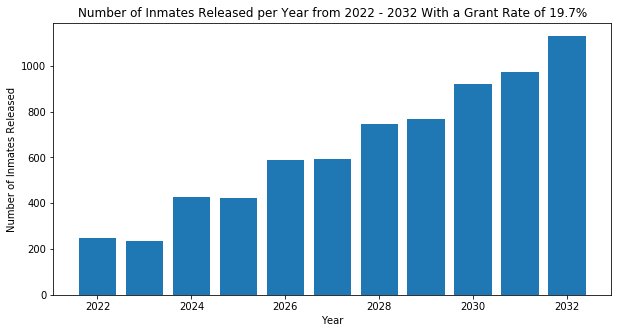

[1252, 1201, 2181.3559999999998, 2147.403, 2981.628868, 3024.3646089999997]


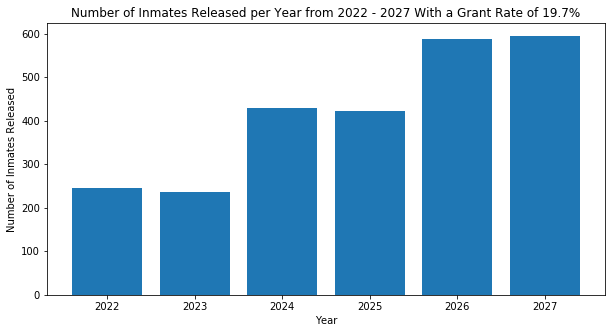

[1252, 1002, 1663.288, 1435.288, 1860.157472, 1745.325472]


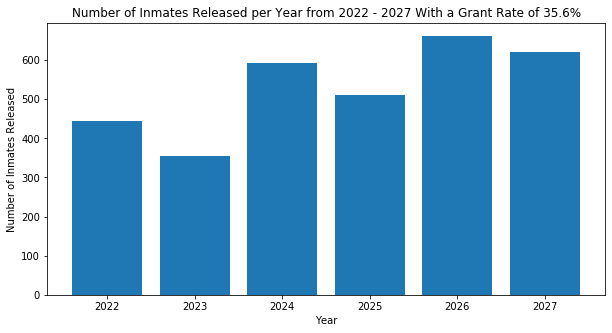

[1252, 1002, 1663.288, 1435.288, 1860.157472, 1745.325472, 2070.941411968, 2052.9896039679998, 2382.6862693073917, 2485.1253049553916, 2821.44995743396]


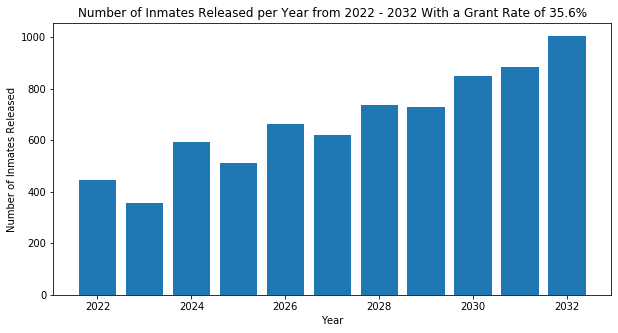

[1252, 865, 1343.82, 1061.7749999999999, 1319.9436999999998, 1202.0496249999999]


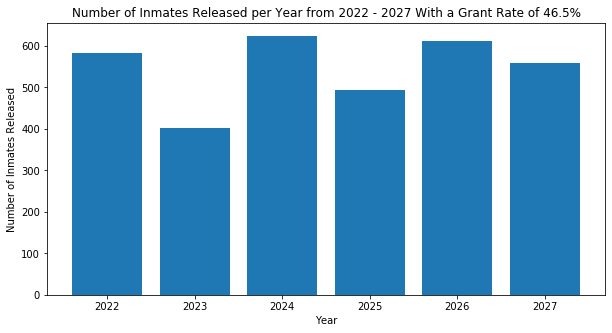

[1252, 865, 1343.82, 1061.7749999999999, 1319.9436999999998, 1202.0496249999999, 1390.1698794999998, 1375.096549375, 1585.7408855324998, 1673.676653915625, 1888.3713737598873]


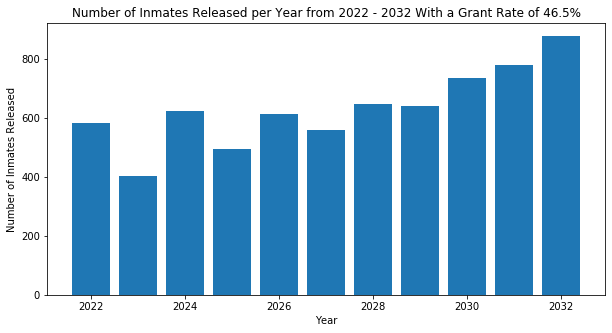

In [156]:
#Plot number of inmates released per year
for yearlyNumReleased in [fiveYearsConservative, tenYearsConservative, fiveYearsMedium,
                          tenYearsMedium, fiveYearsLiberal, tenYearsLiberal]:
    print(yearlyNumReleased[1])
    plt.figure(figsize=(10,5))
    plt.bar(range(2022, 2022 + len(yearlyNumReleased[1])), [int(x * yearlyNumReleased[2]) for x in yearlyNumReleased[1]])
    plt.title("Number of Inmates Released per Year from 2022 - " + str(2021 + len(yearlyNumReleased[1]))+
              " With a Grant Rate of " + str(yearlyNumReleased[2] * 100) + "%")
    plt.xlabel("Year")
    plt.ylabel("Number of Inmates Released")
    plt.show()

### How Calculations were Made
- For the time ranges, 2022-2027 and 2022 - 2032, I pulled out inmates who were over the age of 60 by December 31st per year in the time range, and who had served 20 years, or more of their sentence by December 31st of the same year. The size of this subset of inmates times the grant rates of 19.7%, 35.6%, and 46.5% is the value for the number of inmates over the age of 60, who qualify for EDR in a given year. The sum of this subset per year is the final value.

- The cost per incarcerated person 60 or older per year is \\$68,270. To calculate the total savings, the number of inmates 60 or older who will be released in 2022-2027 or 2022 - 2032, for the following grant rates: 19.7%, 35.6%, or 46.5%, was multiplied by \\$68,270.

# James' work below this cell, Neel's above

Number of additional EDR hearings that would occur from 2023-2043: 32048


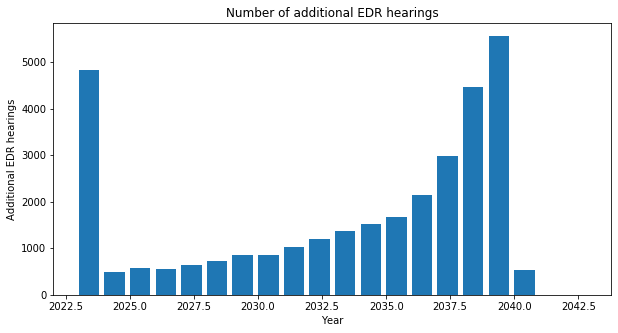

In [154]:
result = calcNumInmatesOfAgeInRange(2023, 2042, 0, 1)
print("Number of additional EDR hearings that would occur from 2023-2043:",result[0])
plt.figure(figsize=(10,5))
plt.bar(range(2023,2043,),result[1],align = 'edge')
plt.title("Number of additional EDR hearings")
plt.xlabel("Year")
plt.ylabel("Additional EDR hearings")
plt.show()

In [157]:
fiftiesLib22 = calcNumInmatesOfAgeInRange(2022, 2022, 50, 0.197)
fiftiesMed22 = calcNumInmatesOfAgeInRange(2022, 2022, 50, 0.356)
fiftiesCons22 = calcNumInmatesOfAgeInRange(2022, 2022, 50, 0.465)
print('\033[1m'+"2022 data"+'\033[0m')
print("Number of inmates over 50 to be released in 2022 with liberal EDR rates:", fiftiesLib22[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $" ,fiftiesLib22[0]*costOfAnInmate)
print("Number of inmates over 50 to be released in 2022 with moderate EDR rates:", fiftiesMed22[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $" ,fiftiesMed22[0]*costOfAnInmate)
print("Number of inmates over 50 to be released in 2022 with conservative EDR rates:", fiftiesCons22[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $", fiftiesCons22[0]*costOfAnInmate)
print()
fiftiesLib27 = calcNumInmatesOfAgeInRange(2022, 2027, 50, 0.197)
fiftiesMed27 = calcNumInmatesOfAgeInRange(2022, 2027, 50, 0.356)
fiftiesCons27 = calcNumInmatesOfAgeInRange(2022, 2027, 50, 0.465)
print('\033[1m'+"2022-2027 data"+'\033[0m')
print("Number of inmates over 50 to be released from 2022 - 2027 with liberal EDR rates:", fiftiesLib27[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $" ,fiftiesLib27[0]*costOfAnInmate)
print("Number of inmates over 50 to be released in 2022 - 2027 with moderate EDR rates:", fiftiesMed27[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $" ,fiftiesMed27[0]*costOfAnInmate)
print("Number of inmates over 50 to be released in 2022 - 2027 with conservative EDR rates:", fiftiesCons27[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $", fiftiesCons27[0]*costOfAnInmate)
print()
fiftiesLib32 = calcNumInmatesOfAgeInRange(2022, 2032, 50, 0.197)
fiftiesMed32 = calcNumInmatesOfAgeInRange(2022, 2032, 50, 0.356)
fiftiesCons32 = calcNumInmatesOfAgeInRange(2022, 2032, 50, 0.465)
print('\033[1m'+"2022-2032 data"+'\033[0m')
print("Number of inmates over 50 to be released in 2022 - 2037 with liberal EDR rates:", fiftiesLib32[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $" ,fiftiesLib32[0]*costOfAnInmate)
print("Number of inmates over 50 to be released in 2022 - 2037 with moderate EDR rates:", fiftiesMed32[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $" ,fiftiesMed32[0]*costOfAnInmate)
print("Number of inmates over 50 to be released in 2022 - 2037 with conservative EDR rates:", fiftiesCons32[0])
print('\t' * 1,"Ammount saved per year where they would otherwise be incarcerated: $", fiftiesCons32[0]*costOfAnInmate)
print()

2022 data
Number of inmates over 50 to be released in 2022 with liberal EDR rates: 509
	 Ammount saved per year where they would otherwise be incarcerated: $ 17374715
Number of inmates over 50 to be released in 2022 with moderate EDR rates: 920
	 Ammount saved per year where they would otherwise be incarcerated: $ 31404200
Number of inmates over 50 to be released in 2022 with conservative EDR rates: 1202
	 Ammount saved per year where they would otherwise be incarcerated: $ 41030270

2022-2027 data
Number of inmates over 50 to be released from 2022 - 2027 with liberal EDR rates: 4959
	 Ammount saved per year where they would otherwise be incarcerated: $ 169275465
Number of inmates over 50 to be released in 2022 - 2027 with moderate EDR rates: 6238
	 Ammount saved per year where they would otherwise be incarcerated: $ 212934130
Number of inmates over 50 to be released in 2022 - 2027 with conservative EDR rates: 6377
	 Ammount saved per year where they would otherwise be incarcerated: $ 